## Library yang akan digunakan

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Memanggil dataset

In [10]:
df = pd.read_csv('country_wise_latest.csv')

## 1. BUSINESS UNDERSTANDING

A. Pengertian
pada tahap ini membutuhkan data dari objek orang orang yang terkena covid-19
untuk mengetahui seberapa orang yang terkena covid-19 agar tau mana yang negative dan mana yang positive


B. Problem 

covid-19 ini merupakan suatu penyakit yang menular dan sangat berbahaya dapat mempengaruhi kesehatan ekonomi 
dan lain-lain para dokter melakukan penelitian dan riset untuk mencantumkan seberapa banyak orang yang terkena
penyakit ini 

C. Tujuan
data shet ini diambil melalui https://www.kaggle.com/datasets/imdevskp/corona-virus-report
bertujuan untuk mengetahui seberapa banyak orang yang terkena covid-19 ini


## 2. DATA UNDERSTANDING

A. Pengertian 

 tahap ini memberikan fondasi analitik untuk sebuah penelitian dengan membuat ringkasan
 (summary)dan mengidentifikasikan potensi masalah dalam data tahap ini juga diharuskan  secara cermat dan tidak terburu buru seperti pada visualisasi data yang terkadang insight sangat sulit dari pengumpulan data yang telah diambil
 mengenai covid-19 ini

## Deskripsi dataset

In [11]:
df.head()

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667


# DATA PREPARATION

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    187 non-null    object
 1   Confirmed  187 non-null    int64 
 2   Deaths     187 non-null    int64 
 3   Recovered  187 non-null    int64 
 4   Active     187 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.4+ KB


## Mencari heatmap

<AxesSubplot:>

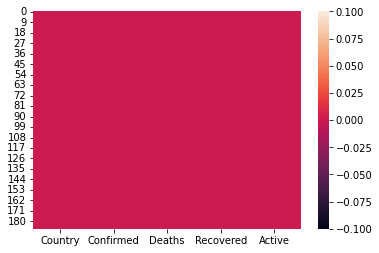

In [13]:
sns.heatmap(df.isnull())

## Melihat Nilai Data

In [14]:
df.describe()

,Confirmed,Deaths,Recovered,Active
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


## Visualisasi Data

<AxesSubplot:>

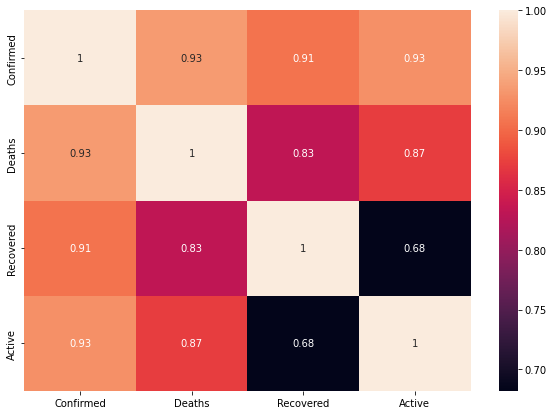

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

## Jumlah Deaths Berdasarkan Negara

In [16]:
brands = df.groupby('Country').count()[['Confirmed']].sort_values(by='Confirmed', ascending=True).reset_index()
brands = brands.rename(columns={'Confirmed':'Deaths'})

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

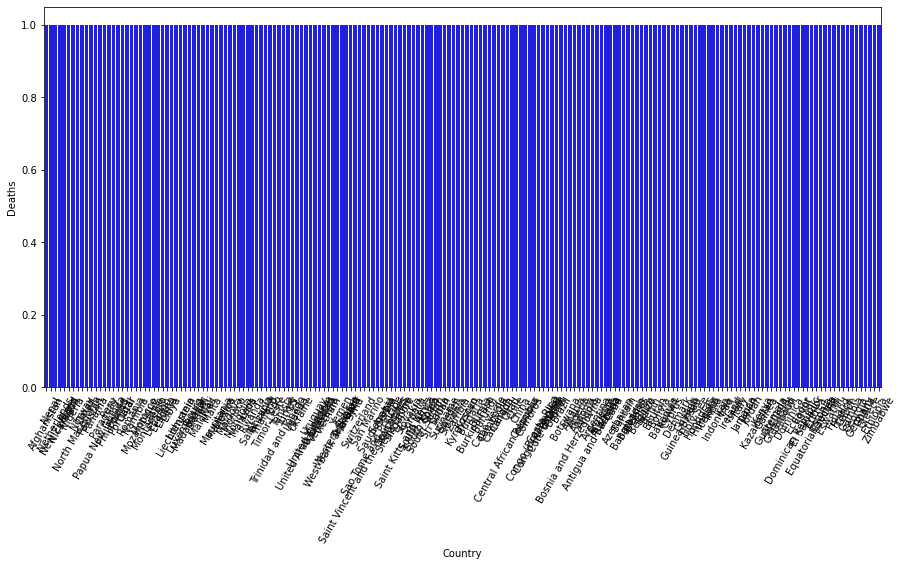

In [18]:
fig = plt.figure(figsize = (15,7))
sns.barplot(x = brands['Country'], y = brands['Deaths'], color = 'blue')
plt.xticks(rotation = 60)

# MODELLING DATA

## Seleksi Fitur

In [19]:
fitur = ['Confirmed', 'Active', 'Recovered']
x = df[fitur]
y = df['Deaths']
x.shape, y.shape

((187, 3), (187,))

## Split Data Training & Testing

In [20]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 70)
y_test.shape

(47,)

## membuat regresi linier

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
predik = lr.predict(X_test)

# EVALUTION DATA

In [24]:
y = lr.score(X_test, y_test)
print('Akurasi Model Regresi Linier : ', y)

Akurasi Model Regresi Linier :  1.0


## Membuat inputan regresi linier

In [25]:
inputan = np.array([[27973, 18837, 7973]])
prediksi = lr.predict(inputan)
print('Estimasi Jumlah Kematian Covid-19  : ', prediksi)

Estimasi Jumlah Kematian Covid-19  :  [1163.]


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# DEPLOYMENT

## Save Model

In [28]:
import pickle
filename = 'estimasi_covid19.sav'
pickle.dump(lr,open(filename,'wb'))